In [1]:
!pip install matplotlib

In [35]:
!pip install wordcloud

In [14]:
import pandas as pd

In [5]:
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [6]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
all_files= glob.glob('C:/Users/X-Note/bigdata/textMining/sourceEng/myCabinetExcelData*.xls')
all_files

['C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (1).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (10).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (2).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (3).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (4).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (5).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (6).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (7).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (8).xls',
 'C:/Users/X-Note/bigdata/textMining/sourceEng\\myCabinetExcelData (9).xls']

In [11]:
all_files_data=[]
for file in all_files:
    data_frame=pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,"Capturing the value of biosurveillance ""big da...","Castle, David; Hebert, Paul D.N.; Clare, Eliza...",John Wiley & Sons Ltd,2021
4,NaN,5,Multiple Targets Tracking with Big Data-Based ...,"Yu, Yao; Zhao, Junhui; Lenan, Wu",Mary Ann Leibert,2019
...,...,...,...,...,...,...
95,NaN,96,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019
96,NaN,97,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
97,NaN,98,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
98,NaN,99,STGI：a spatio-temporal grid index model for ma...,"Qu, Tengteng; Wang, Lizhe; Yu, Jian; Yan, Jini...",John Wiley & Sons Ltd,2020


In [16]:
all_files_data_concat= pd.concat(all_files_data,axis= 0 , ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,"Capturing the value of biosurveillance ""big da...","Castle, David; Hebert, Paul D.N.; Clare, Eliza...",John Wiley & Sons Ltd,2021
4,NaN,5,Multiple Targets Tracking with Big Data-Based ...,"Yu, Yao; Zhao, Junhui; Lenan, Wu",Mary Ann Leibert,2019
...,...,...,...,...,...,...
995,NaN,96,IoT-Based Big Data: From Smart City towards Ne...,"Rathore, M. Mazhar; Paul, Anand; Ahmad, Awa...",IDEA GROUP PUBLISHING,2017
996,NaN,97,Novel Big Data-supported dynamic toll charging...,"Figueiras, Paulo; Gonçalves, Diogo; Costa, Rub...","Elsevier Science B.V., Amsterdam.",2019
997,NaN,98,"Beyond Big Data: Surveillance, Metadata and Te...","Wells, David",IOS Press.,2016
998,NaN,99,Using data-driven safety decision-making to re...,"Wang, Bing; Wu, Chao; Huang, Lang; Kang, Liangguo","Elsevier Science B.V., Amsterdam.",2019


In [18]:
all_files_data_concat.to_csv('C:/Users/X-Note/bigdata/textMining/eng/riss_bigdata.csv',encoding='utf-8',index=False)

In [20]:
all_title=all_files_data_concat['제목']
all_title

0            Architecting Time-Critical Big-Data Systems
1      A trust-based crowdfunding campaign marketing ...
2      Computation migration: a new approach to execu...
3      Capturing the value of biosurveillance "big da...
4      Multiple Targets Tracking with Big Data-Based ...
                             ...                        
995    IoT-Based Big Data: From Smart City towards Ne...
996    Novel Big Data-supported dynamic toll charging...
997    Beyond Big Data: Surveillance, Metadata and Te...
998    Using data-driven safety decision-making to re...
999    Educational big data: extracting meaning from ...
Name: 제목, Length: 1000, dtype: object

In [21]:
stopWords=set(stopwords.words("english"))
lemma= WordNetLemmatizer()

In [27]:
words = []

for title in all_title:
    EnWords=re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken=word_tokenize(EnWords.lower())
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [28]:
print(words)

[['architecting', 'time', 'critical', 'big', 'data', 'system'], ['trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting'], ['multiple', 'target', 'tracking', 'big', 'data', 'based', 'measurement', 'extended', 'binary', 'phase', 'shift', 'keying', 'transceiver'], ['sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier'], ['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['diversity', 'big', 'data', 'review'], ['role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction'], ['scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduate', 

In [31]:
words2= list(reduce(lambda x,y:x+y,words))
print(words2)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'capturing', 'value', 'biosurveillance', 'big', 'data', 'natural', 'capital', 'accounting', 'multiple', 'target', 'tracking', 'big', 'data', 'based', 'measurement', 'extended', 'binary', 'phase', 'shift', 'keying', 'transceiver', 'sport', 'analytics', 'era', 'big', 'data', 'moving', 'toward', 'next', 'frontier', 'author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'diversity', 'big', 'data', 'review', 'role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction', 'scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduate', 'education', 'data'

In [33]:
count=Counter(words2)

count

Counter({'architecting': 1,
         'time': 20,
         'critical': 6,
         'big': 1117,
         'data': 1244,
         'system': 56,
         'trust': 1,
         'based': 98,
         'crowdfunding': 2,
         'campaign': 2,
         'marketing': 7,
         'framework': 33,
         'theoretical': 7,
         'underpinnings': 1,
         'analytics': 103,
         'practice': 11,
         'computation': 3,
         'migration': 1,
         'new': 42,
         'approach': 55,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'capturing': 2,
         'value': 11,
         'biosurveillance': 1,
         'natural': 2,
         'capital': 2,
         'accounting': 4,
         'multiple': 3,
         'target': 3,
         'tracking': 4,
         'measurement': 8,
         'extended': 2,
         'binary': 2,
         'phase': 4,
         'shift': 2,
         'keying': 1,
         'transceiver': 1,
         'sport': 4,
         'era': 30,
      

In [35]:
word_count=dict()

for tag,counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("%s:%d"%(tag,counts))

data:1244
big:1117
analytics:103
based:98
analysis:84
driven:64
using:58
system:56
approach:55
challenge:48
learning:45
model:44
new:42
application:42
issue:39
science:35
framework:33
health:33
research:32
management:32
platform:32
era:30
opportunity:30
cloud:30
special:27
smart:27
information:26
network:26
review:25
processing:25
perspective:25
algorithm:25
technology:24
earth:24
machine:24
mining:23
computing:23
process:23
use:22
call:22
social:21
business:21
service:21
real:21
time:20
paper:20
development:20
performance:20
energy:20
world:20


<function matplotlib.pyplot.show(close=None, block=None)>

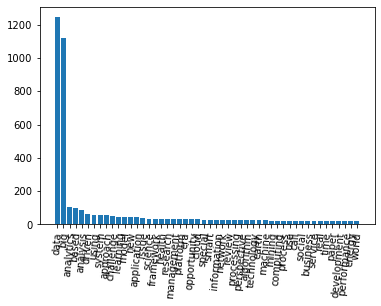

In [37]:
sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values= sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)),sorted_Values,align='center')
plt.xticks(range(len(word_count)),list(sorted_Keys),rotation='85')
plt.show

In [39]:
del word_count['big']
del word_count['data']

KeyError: 'big'

In [42]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('출판일',as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2011,7
4,2012,20
5,2013,61
6,2014,139
7,2015,109
8,2016,122
9,2017,138


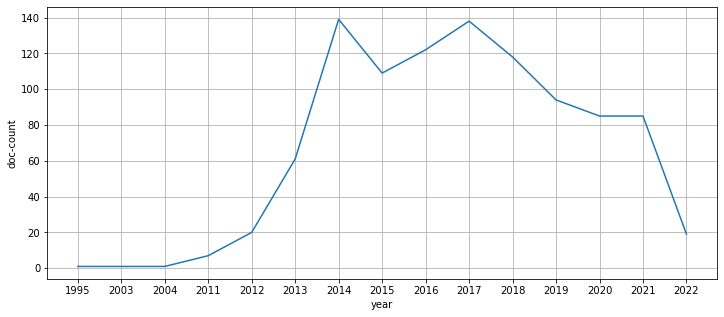

In [44]:
plt.figure(figsize= (12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)),[text for text in summary_year['출판일']])
plt.show()

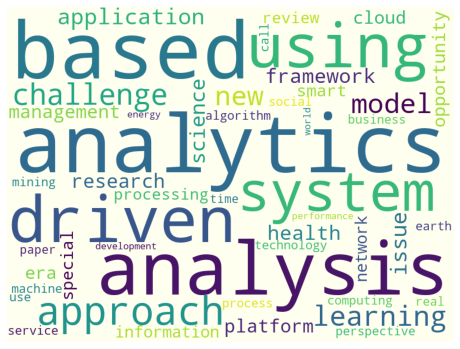

In [46]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color = 'ivory',stopwords=stopwords,width=800,height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()
